# `Matplotlib annotations`

In [2]:
import pandas as pd
import duckdb

df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")

df

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Woonsocket,Rhode Island,5,"12,518",1.0,15.0,NaN,1,52,64,...,131,8.0,NaN,45,7,25,7,2,NaN,1.0
157,Worcester,Massachusetts,10,"37,652",1.0,192.0,11,12,103,20,...,714,8.0,2,"7,542",21,614,40,38,55.0,4.0
158,Yonkers,New York,65,"14,634",2.0,26.0,4,7,"1,032",6,...,572,2.0,2,289,75,18,45,19,4.0,9.0
159,York,Pennsylvania,5,"1,304",2.0,2.0,NaN,NaN,64,1,...,25,NaN,1,10,18,1,7,1,NaN,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   City                                         161 non-null    object 
 1   State                                        161 non-null    object 
 2   Error                                        161 non-null    int64  
 3   Total foreign born                           161 non-null    object 
 4   Africa                                       120 non-null    float64
 5   Asia (except China, Japan, and India)        133 non-null    float64
 6   Atlantic Islands                             99 non-null     object 
 7   Australia                                    136 non-null    object 
 8   Austria                                      161 non-null    object 
 9   Belgium                                      145 non-null    object 
 10  Bo

In [4]:
df["Total foreign born"].iloc[0]

'7,127'

In [5]:
columns = ["Sweden", "Norway", "Finland", "Denmark", "Total foreign born"]

df_nordic = df[columns]

df_nordic.head()

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,"7,127"
1,65,12,3,21,"17,718"
2,186,9,5,15,"30,216"
3,5,2,NaN,5,"2,991"
4,32,4,3,5,"3,301"


In [6]:
df_nordic = df_nordic.fillna("0")

In [7]:
for column in columns:
    df[column] = df_nordic[column].str.replace(",","").astype(int)

df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,7127,4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,17718,3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,30216,4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,2991,NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,3301,2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [8]:

df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Sweden              161 non-null    int64
 1   Norway              161 non-null    int64
 2   Finland             161 non-null    int64
 3   Denmark             161 non-null    int64
 4   Total foreign born  161 non-null    int64
dtypes: int64(5)
memory usage: 6.4 KB


In [9]:
df_nordic_count = duckdb.query("""--sql
    WITH nordic AS (
        FROM df
        SELECT
             state,
             SUM("Total foreign born") AS "Total foreigners",
             SUM(Sweden) AS Swedes,
             SUM(Norway) AS Norwegians,
             SUM(Finland) AS Finnish,
             SUM(Denmark) AS Danish,
        GROUP BY state
    )
             FROM NORDIC n
             SELECT *, n.Swedes + n.Norwegians + n.Finnish + n.Danish AS Nordic
             ORDER BY Nordic
             DESC
""").df()

df_nordic_count.head()

,State,Total foreigners,Swedes,Norwegians,Finnish,Danish,Nordic
0,Illinois,627465.0,57158.0,22300.0,447.0,10374.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,1101.0,2975.0,56147.0
2,New York,1521931.0,29961.0,11752.0,3764.0,6186.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,3154.0,1451.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,405.0,4024.0,14948.0


In [10]:
df_nordic_count.shape

(39, 7)

TODO for reader:
- More visualizations on Nordic
- More visualizations on Total foreigners
- ex bar charts for different states
- compare nordic to total foreigners

In [11]:
import matplotlib.pyplot as plt

top_3_nordic = (
    df_nordic_count.drop(["Total foreigners", "Nordic"], axis=1).set_index("State").iloc[:3]
)
top_3_nordic

,Swedes,Norwegians,Finnish,Danish
State,,,,
Illinois,57158.0,22300.0,447.0,10374.0
Minnesota,34984.0,17087.0,1101.0,2975.0
New York,29961.0,11752.0,3764.0,6186.0


(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

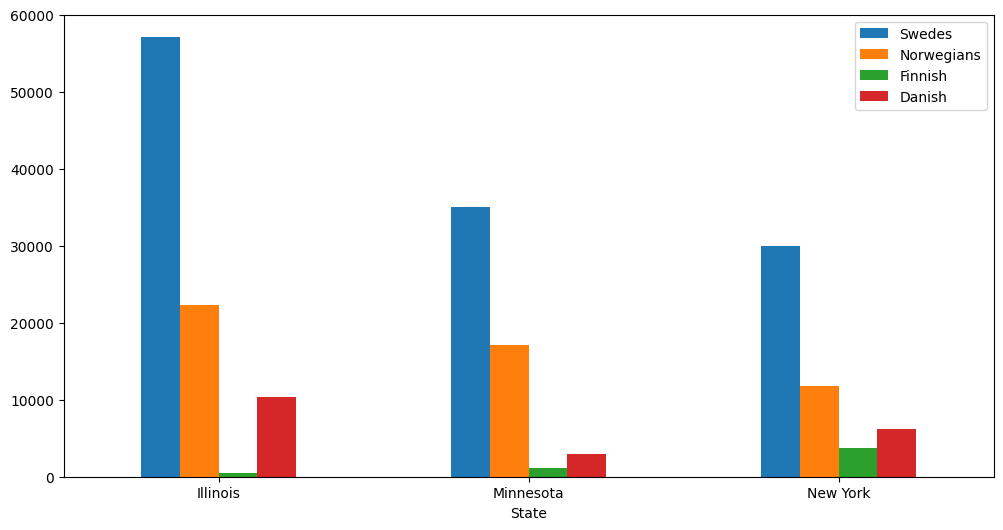

In [12]:
def nordic_plot():
    ax = top_3_nordic.plot(kind="bar", figsize=(12,6))
    ax.set_xticklabels(top_3_nordic.index, rotation = 0)

    fig = ax.get_figure()

    return fig, ax

nordic_plot()

[<BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>]

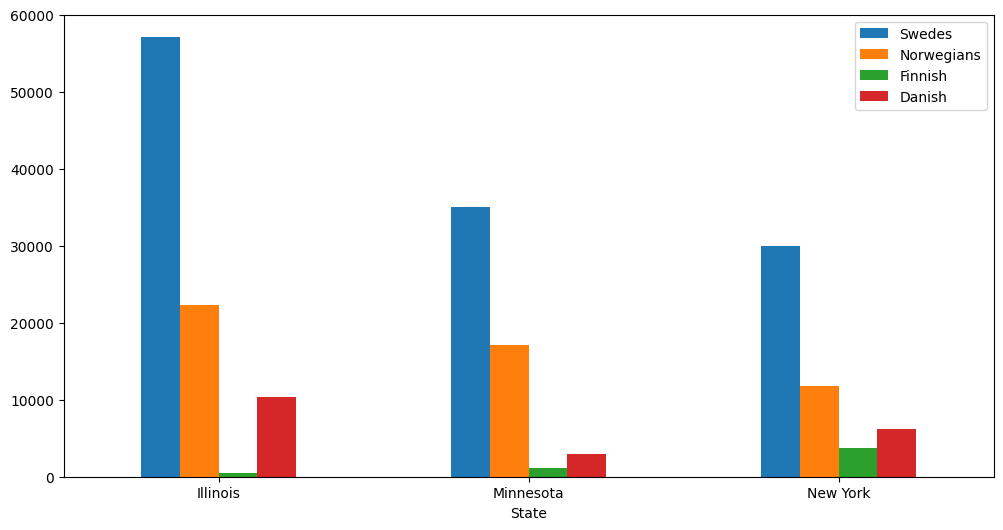

In [13]:
fig, ax = nordic_plot()

ax.containers

In [14]:
ax.containers[0]

<BarContainer object of 3 artists>

In [15]:
ax.containers[0][1].get_height(), ax.containers[0][1].get_x()

(np.float64(34984.0), np.float64(0.75))

## Annotate

Text(0.8, 42000, 'Swedes')

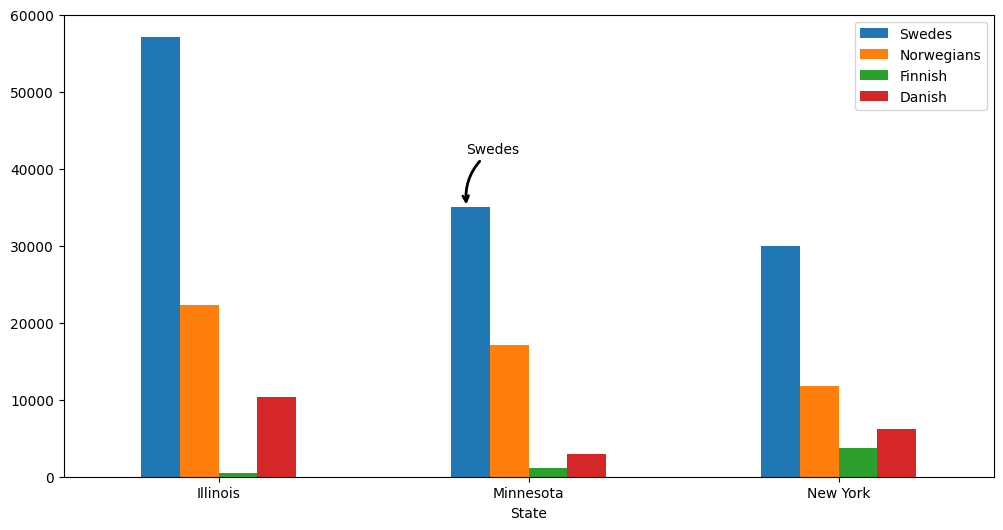

In [18]:
fig, ax = nordic_plot()

arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle = "arc3, rad=.3")
ax.annotate(text= "Swedes", xy = [0.8,35000], arrowprops=arrowprops, xytext=[.8, 42000])

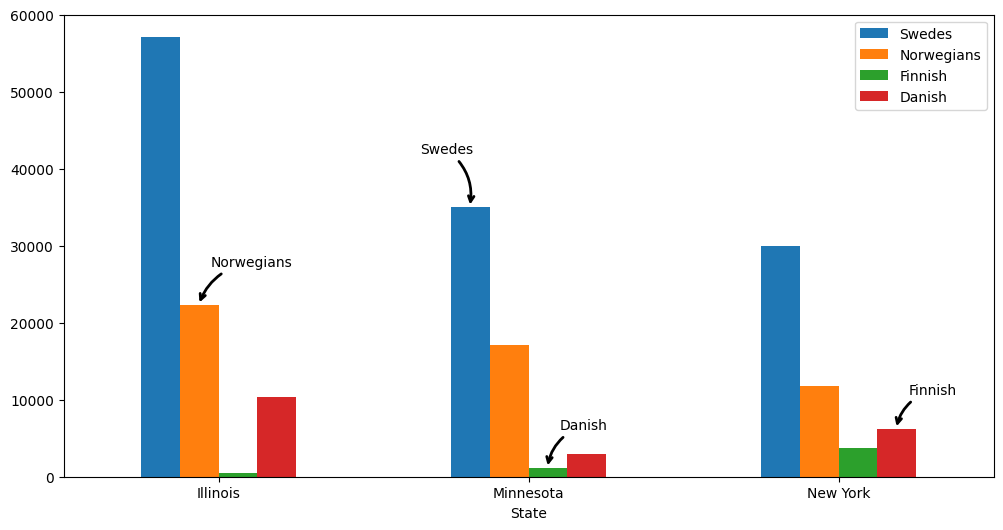

In [22]:
fig, ax = nordic_plot()

# tuple unpacking of ax.containers that is a list of four BarContainers, which contains 3 Artists each
swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers


def annotate_nordic(bar_artist, text, x_offset, y_offset):

    xy = (bar_artist.get_x(), bar_artist.get_height())

    # ternary if statement
    rad = 0.3 if x_offset > 0 else -0.3

    arrowprops = dict(arrowstyle="->", linewidth=2, connectionstyle=f"arc3, rad={rad}")
    ax.annotate(
        text=text,
        xy=(xy[0] + 0.06, xy[1]),
        arrowprops=arrowprops,
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
    )


annotate_nordic(swede_bars[1], "Swedes", -0.1, 7000)
annotate_nordic(norwegian_bars[0], "Norwegians", 0.1, 5000)
annotate_nordic(finnish_bars[2], "Finnish", 0.1, 4500)
annotate_nordic(danish_bars[1],"Danish", 0.1, 5000)
# TODO for reader:
# draw other annotations 
# remove legend 
# save the figure 